# Cell Types Project
*Replace this with the name of your project*

## Team Member Names & Contributions
Group 3
- **Chloe Nguyen (A16794414)**: Responsible for data wrangling and importation, data visualization, and data analysis with relevant statistical tests
- **Amber Selstad (A16898643)**: 

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

How do the electrophysiological profiles of human neurons differ by depth (superficial versus deeper layers of the prefrontcal cortex), and how do their gene expression differences also reflect these differences and contribute to their overall function?

# Background and Prior Work

*Fill in your background and prior work here (~500 words). You are welcome to use additional subheadings. You should also include a paragraph describing each dataset and how you'll be using them.* 

- describe the differences in function between neurons in different layers from past research
- reference how all 4 properties may differ across layers (layer 3 supposed to be less excitable in rat frontal lobe -- want to see how it could be similar or diff in human temporal lobe)**


- research different genes involved in the middle temporal gyrus in each layer for gene expression analysis

### Prior Work
A 2018 study by Song and Moyer explored the electrophysiological differences between layers 2/3 (L2/3) and layer 5 (L5) in the medial prefrontal cortex of rats[1]. Overall, they found that L2/3 neurons were less excitable and more hyperpolarized than L5 neurons, specifically testing electrophysiological features such as resting membrane potential(RMP), input resistance(Ri), threshold, and minimum current to reach threshold. To test the generalizability of these results, we decided to test in a different species model, humans, and a different brain region, the medial temporal gyrus. 

### Anatomy and Function of Layers

For our project, we are focusing on understanding how several electrophysiological features and the expression of related genes differ between layers 3 and 5 of the human medial temporal gyrus (MTG). Layer 3, also called the External Pyramidal Layer, consists of mostly pyramidal cells with outputs to the contralateral hemisphere of cortex. Layer 5, also called the Internal Pyramidal Layer, consists of pyramidal cells with outputs to regions outside the cortex including subcortical structures.[source] 

### Electrophysiological Properties
We chose to analyze four specific electrophysiological properties that relate to the excitabilty of a neuron: resting membrane potential(v_rest), input resistance(ri), threshold voltage after short square stimulus,(threshold_v_short_square), and the current amplitude of short square stimulus to reach threshold (threshold_i_short_square). 

A lowered resting membrane potential means the cell is hyperpolarized, thereby less excitable because it is harder to reach threshold. In accordance with Ohm's Law I = V/R, less excitable cells typically require an increased amplitude of stimulus current to compensate for the decreased input resistance and/or increased voltage threshold. Therefore, we will test if any or all of these features are significantly different between the L3 and L5 neurons. 

Once determining which electrophysiology features differ between L3 and L5 neurons

Based on previous research (Song & Moyer, 2018) and our understanding of how these electrophysiological properties relate to excitabilty, we hypothesize that when compared to L5 neurons, L3 neurons will have a lower v_rest, threshold_v_short_square, and ri, anf higher threshold_i_short_square.


### Gene Expression


### References (include links):
(1) Song, C., & Moyer, J. R. (2018, January 1). Layer- and subregion-specific differences in the neurophysiological properties of rat medial prefrontal cortex pyramidal neurons. Journal of neurophysiology. https://pmc.ncbi.nlm.nih.gov/articles/PMC5866461/#ref-list1 

(2)

## Hypothesis


Based on previous research (Song & Moyer, 2018), as well as our understanding of neurobiology and how these electrophysiological properties relate to excitabilty, we hypothesize that when compared to L5 neurons, L3 neurons will have a lower v_rest, threshold_v_short_square, and ri, and higher threshold_i_short_square. [include hypothesis about gene expression differences]


## Setup

In [1]:
## This code imports packages essential for downstream data wrangling, analysis, manipulation, etc. Figures are plotted within the Jupyter notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

## Data Wrangling

Both datasets of interest for our project come from the Allen Brain Institute, specifically the Allen Cell Types website (https://celltypes.brain-map.org/data) and the Allen RNA-seq website (https://celltypes.brain-map.org/data). The Cell Types website provides an extensive database of electrophysiological and morphogical features of both human and mouse cells, which we will utilize to filter for the samples needed to answer our research question.

The Allen Software Development Kit (AllenSDK) is a core package that facilitates reading and processing Allen Brain Institute data like the Cell Types one. First, once AllenSDK is installed, the 'CellTypesCache' module can extract and access the Cell Types database within a Python environment, while the 'CellTypesApi' module then enables us to query the database. After initalizing the cache to ctc, we can then begin filtering this data.

In [2]:
# Importing the Allen Cell Types database into Python
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# Creating a dataframe with only human cells
human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
human_df = pd.DataFrame(human_cells)

# Setting the index to the specimen id instead of arbitrary index values
human_df = human_df.set_index('id') 

# Showcasing the first 5 rows of this dataframe
human_df.head(5)

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,None,epilepsy,536912860,right,NaN
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,full,tumor,595954915,left,0.497825


For the scope of our project, we are interested in comparing neurons found in layer 3 and layer 5 of the cerebral cortex, so we will continue to filter our datasets even further.

In [3]:
# Creating separate datasets for layer 3 versus layer 5 neurons
human_layer3 = human_df[human_df['structure_layer_name'] == '3']
human_layer5 = human_df[human_df['structure_layer_name'] == '5']

In [4]:
# Checking the dataframe to ensure it has the correct rows
human_layer3.head(5) 

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
545608578,None,"[312.0, 280.0, 89.0]",Homo Sapiens,H16.03.010.13.06.01,3,12141,MTG,,spiny,intact,None,epilepsy,545510854,right,NaN
561467633,None,"[79.0, 273.0, 86.0]",Homo Sapiens,H16.06.013.12.08.05,3,12141,MTG,,spiny,truncated,None,epilepsy,561414332,left,NaN
530055374,None,"[70.0, 260.0, 111.0]",Homo Sapiens,H16.06.010.01.03.14.01,3,12141,MTG,,spiny,truncated,None,epilepsy,529678110,left,NaN


In [5]:
# Checking the dataframe to ensure it has the correct rows
human_layer5.head(5)

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
576095991,None,"[274.0, 331.0, 228.0]",Homo Sapiens,H17.06.007.11.08.01,5,12116,MFG,,aspiny,NA,full,tumor,576060516,right,0.673428
567776248,None,"[82.0, 272.0, 81.0]",Homo Sapiens,H17.06.003.12.06.03,5,12141,MTG,,spiny,truncated,None,epilepsy,567704703,left,NaN
527942865,None,"[67.0, 256.0, 110.0]",Homo Sapiens,H16.06.008.01.26.04,5,12141,MTG,,spiny,truncated,full,epilepsy,527747035,left,0.694466
508280385,None,"[325.0, 257.0, 102.0]",Homo Sapiens,H16.06.004.01.04.02,5,12141,MTG,,spiny,truncated,None,epilepsy,504921484,right,NaN


In [6]:
# Checking the number of cells in each database
print(len(human_layer3))
print(len(human_layer5))

225
87


After creating separate dataframes for our layer 3 versus layer 3 cortical cell data, we then need to import their corresponding electrophysiological data. This enables us to compare and contrast their behaviors given their different morphological features, especially layer 3 and 5 neurons are known to perform different functions and responses to inputs/stimuli. This can be done with the get_ephys_features function provided by the AllenSDK package.

In [7]:
ephys_features = ctc.get_ephys_features()
ephys_features = pd.DataFrame(ephys_features)
ephys_features = ephys_features.set_index('specimen_id') # Setting the index by specimen_id, similar to how the previous dataframes were set to 'id' 
print(ephys_features.columns)

Index(['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_ramp', 'slow_trough_v_short_square', 'tau',
       'threshold_i_long_square', 'threshold_i_ramp',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_ramp', 'threshold_t_short_square',
       'threshold_v_long_square', 'threshold_v_ramp',
       'threshold_v_short_square

We then have to merge together our Layer 3 and Layer 5 neuron dataframes with their respective ephys data, doing so with the pandas 'join' with the default 'inner' function that will only merge entrices that appear in both dataframes.

In [8]:
human_3_ephys = human_layer3.join(ephys_features, how='inner')
human_5_ephys = human_layer5.join(ephys_features, how='inner')

In [9]:
human_3_ephys.head(5) # Checking the dataframe to ensure the merge was successful

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,...,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
545608578,None,"[312.0, 280.0, 89.0]",Homo Sapiens,H16.03.010.13.06.01,3,12141,MTG,,spiny,intact,...,22.069340,1.112633,-54.343754,-54.968751,-75.156258,3.675430,3.665890,3.586321,-78.500000,-74.496262
561467633,None,"[79.0, 273.0, 86.0]",Homo Sapiens,H16.06.013.12.08.05,3,12141,MTG,,spiny,truncated,...,6.479140,1.174147,-60.312504,-57.989586,-71.020838,4.149998,3.667004,3.929834,-78.312500,-69.626610
530055374,None,"[70.0, 260.0, 111.0]",Homo Sapiens,H16.06.010.01.03.14.01,3,12141,MTG,,spiny,truncated,...,19.934720,1.268865,-57.781254,-54.687503,-74.789068,3.522500,3.079748,3.442388,-82.687508,-74.551102


In [10]:
human_5_ephys.head(5) # Checking the dataframe to ensure the merge was successful

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
576095991,None,"[274.0, 331.0, 228.0]",Homo Sapiens,H17.06.007.11.08.01,5,12116,MFG,,aspiny,NA,...,3.245000,1.053000,-59.156254,-61.437502,-67.625004,2.520616,2.586455,2.219604,-81.406250,-64.442192
567776248,None,"[82.0, 272.0, 81.0]",Homo Sapiens,H17.06.003.12.06.03,5,12141,MTG,,spiny,truncated,...,2.006513,1.493430,-55.593750,-54.427087,-61.656254,3.107241,3.447558,3.314537,-94.468758,-59.619102
527942865,None,"[67.0, 256.0, 110.0]",Homo Sapiens,H16.06.008.01.26.04,5,12141,MTG,,spiny,truncated,...,4.221673,1.026132,-59.250004,-56.770837,-51.025002,3.906185,3.814117,3.756346,-82.593758,-67.725143
508280385,None,"[325.0, 257.0, 102.0]",Homo Sapiens,H16.06.004.01.04.02,5,12141,MTG,,spiny,truncated,...,4.870667,1.105107,-55.000000,-53.875004,-57.572919,5.038992,4.715647,4.458706,-80.843758,-66.651588


We can now begin to compare the two different neuron types by their electrophysiological data. Instead of comparing every single variable, we are choosing to compare a few key properties that reflect general basic neuron electrophysiology: resting membrane potential (vrest), input resistance (ri), minimum voltage threshold needed to trigger an action potential (threshold_v_short_square), and current needed to reach action potential threshold after a short square pulse (threshold_i_short_square). 

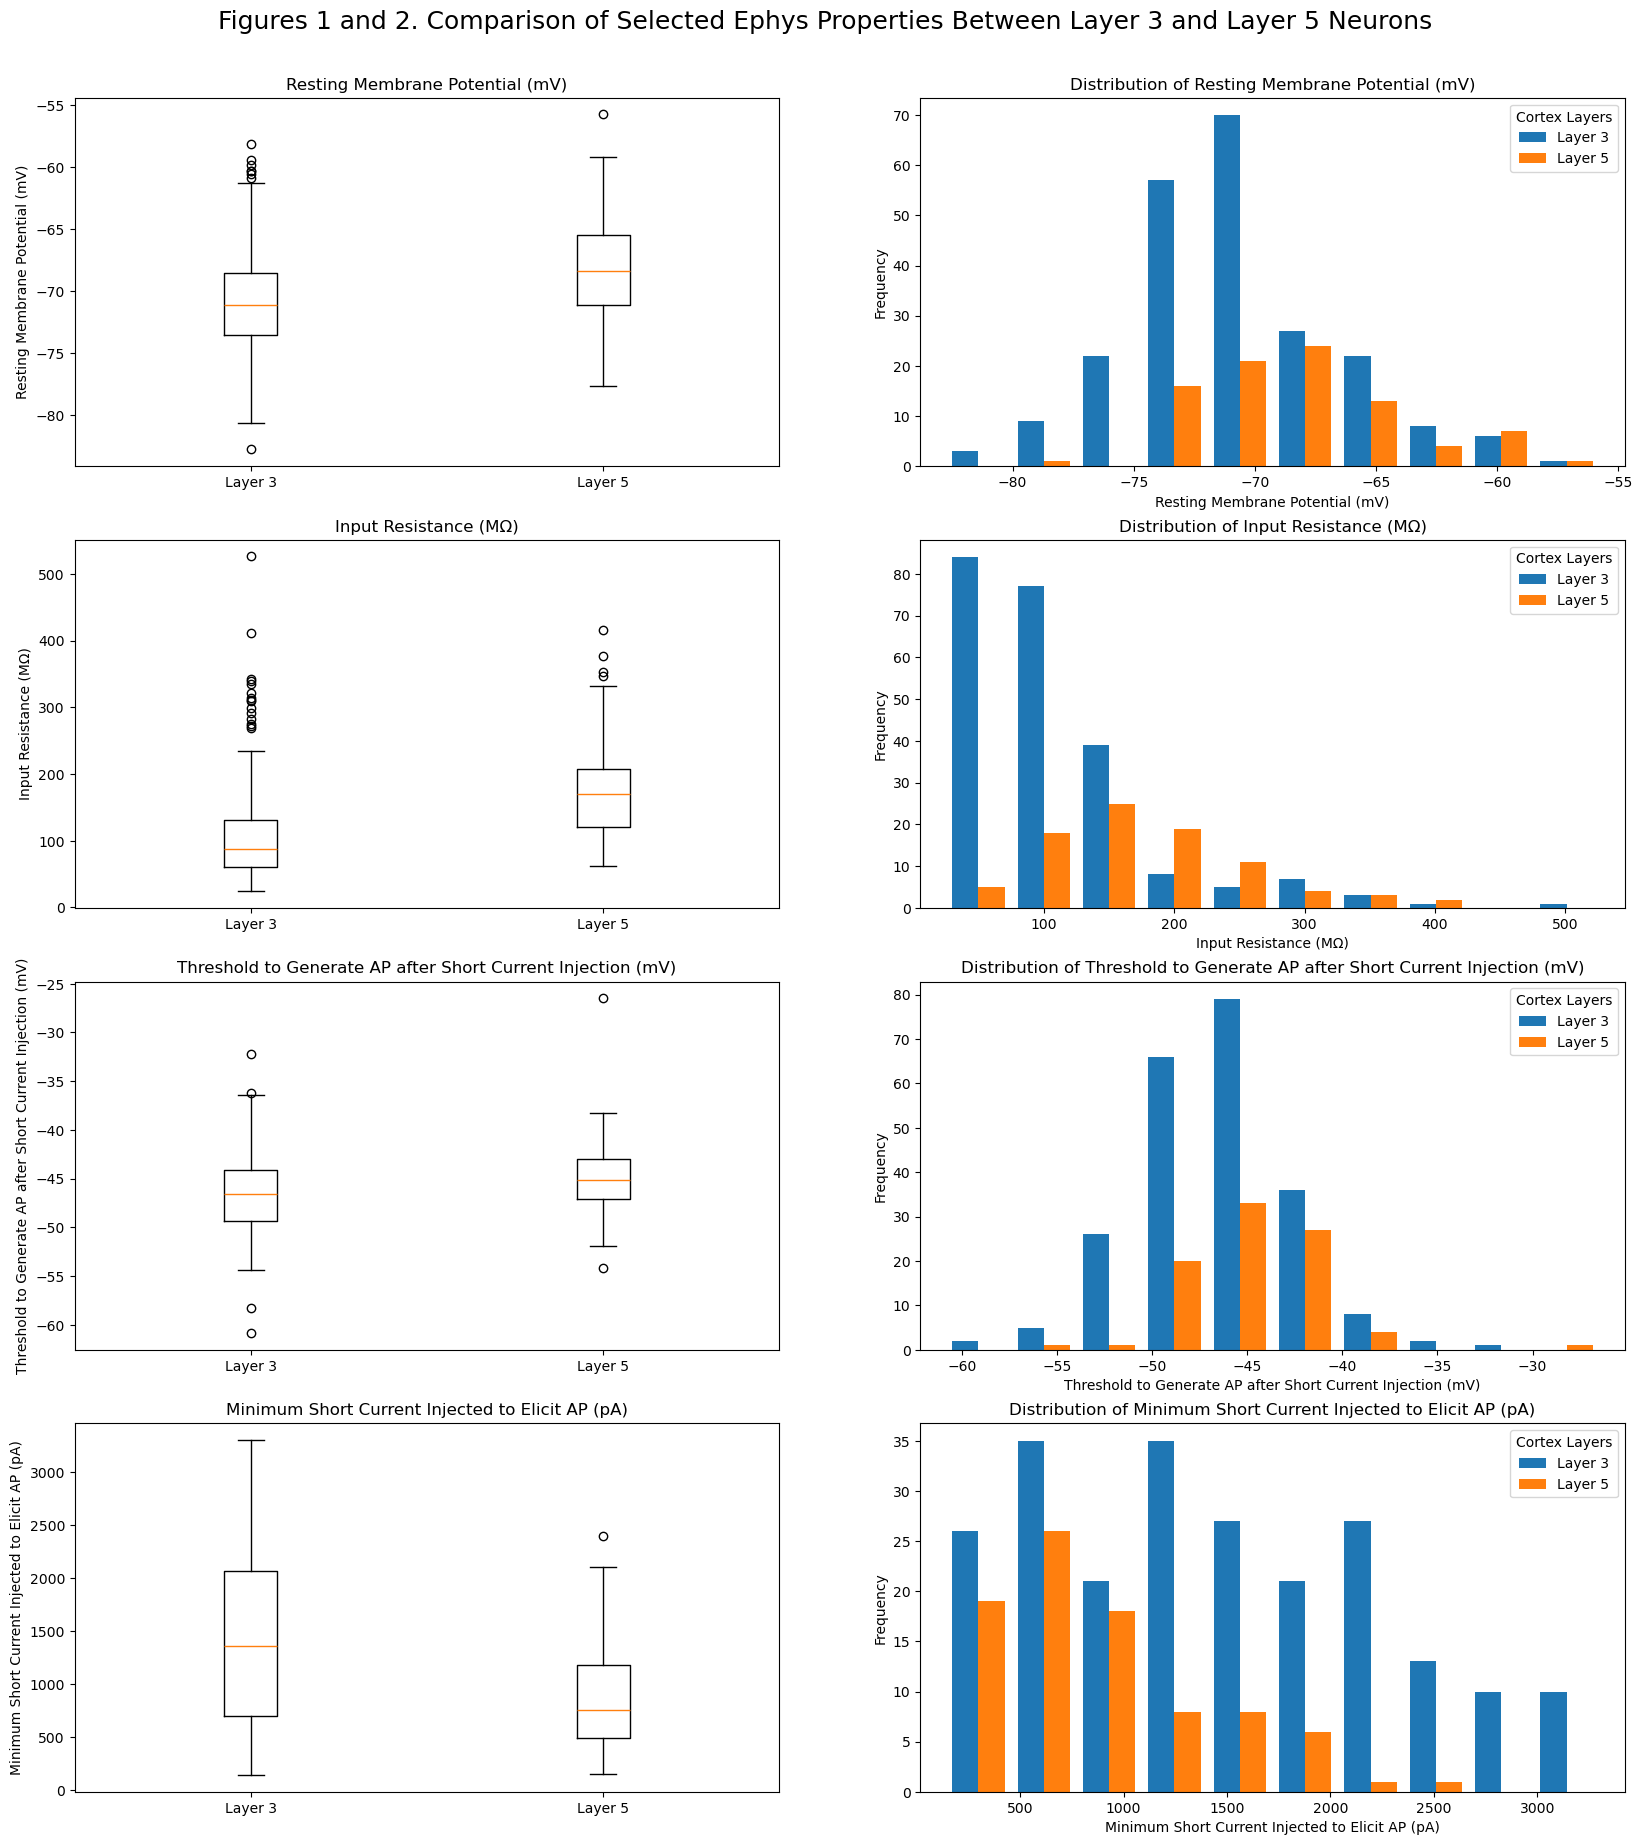

In [11]:
fig, ax = plt.subplots(4,2, figsize=(20,22))

# Creating a list of ephys properties that will be plotted
ephys_properties = ['vrest', 'ri', 'threshold_v_short_square', 'threshold_i_short_square']
ephys_feature_title = ['Resting Membrane Potential (mV)', 'Input Resistance (MΩ)', 'Threshold to Generate AP after Short Current Injection (mV)', 'Minimum Short Current Injected to Elicit AP (pA)']

# Establishing an index for the downstream looping
index = 0

# Looping through each ephys property to make its own separate subplot in the entire figure
for item in ephys_properties:
    
    # Removing NaN values that might skew the data distribution and/or visualization
    layer3_ephys = human_3_ephys[item].dropna()
    layer5_ephys = human_5_ephys[item].dropna()
    
    # Plotting each property with its own x-axis and y-axis labels as a boxplot on the left column
    ax[index, 0].boxplot([layer3_ephys, layer5_ephys])
    ax[index, 0].set_xticks([1, 2]) 
    ax[index, 0].set_xticklabels(["Layer 3", "Layer 5"])
    ax[index, 0].set_ylabel(ephys_feature_title[index])
    ax[index, 0].set_title(f'{ephys_feature_title[index]}')

     # Plotting each property with its own x-axis and y-axis labels as a histogram on the right column
    ax[index, 1].hist([layer3_ephys, layer5_ephys], label=['Layer 3', 'Layer 5'])
    ax[index, 1].legend(title = "Cortex Layers")
    ax[index, 1].set_xlabel(f'{ephys_feature_title[index]}')
    ax[index, 1].set_ylabel('Frequency')
    ax[index, 1].set_title(f'Distribution of {ephys_feature_title[index]}')
    
    # After the first subplot is made, the loop will move to the next property
    index += 1 

# Adding an overarching figure title 
fig.suptitle("Figures 1 and 2. Comparison of Selected Ephys Properties Between Layer 3 and Layer 5 Neurons", fontsize=18,y=0.92)

plt.show()


Figure 1. The boxplots display the median (orange line) and interquartile range (Q1-Q3) for the distribution of each property for layer 3 and layer 5 neurons, with any outliers (circles) present outside of the whiskers. Given the results of Figure 1, it appears that there is similar overlap between layer 3 and layer 5 cortical neurons across all ephys properties, with the most visually different property being the input resistance. However, we will confirm any statistically signficant differences in the downstream data analysis/results section to make any solid conclusions. 

Figure 2. To see if our data follows a normal distribution pattern, we also want to analyze the histograms of the distributions for each ephys property, as this will help us determine what kind of statistical test to run to determine any significance between our ephys properties. 

Moving forward to the gene expression, we will also be using the Allen RNA-Seq data (https://celltypes.brain-map.org/rnaseq/search), which showcases the RNA transcriptomic expression in cells, such as which genes are expressed and how much. This could prvide valuable insight on gene expression differences between Layer 3 and Layer 5 cortical neurons, such as genes involved in a neuron's electrophysiology like ion channels. The Allen Brain Institute unfortunately does not provide a separate package to access RNA-Seq data, so we manually downloaded the Human Multiple Cortical Areas SMART-seq gene expression matrix and metadata files into our notebook folders for data wrangling.

From our prior background research, we have identified candidate genes that previous research has implicated to be important in determining a neuron's electrophysiological state: _________ 

In [18]:
# Uploading the metadata file that will help us sort for MTG neurons in layer 3 and layer 5
gene_metadata = pd.read_csv('metadata.csv')
gene_metadata = pd.DataFrame(gene_df)
gene_metadata.head()

,sample_name,exp_component_name,specimen_type,cluster_color,cluster_order,cluster_label,class_color,class_order,class_label,subclass_color,...,cell_type_alt_alias_order,cell_type_alt_alias_label,cell_type_designation_color,cell_type_designation_order,cell_type_designation_label,external_donor_name_color,external_donor_name_order,external_donor_name_label,outlier_call,outlier_type
0,F2S4_160113_027_A01,LS-15005h_S01_E1-50,nucleus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,#3DCC3D,2,H200.1025,True,Outlier L1-3 SST OR2AD1P
1,F2S4_160113_027_B01,LS-15005h_S02_E1-50,nucleus,#E170FE,32.0,Inh L2-5 VIP TOX2,#0066FF,4.0,GABAergic,#996517,...,32.0,NaN,#E170FE,32.0,Neuron 032,#3DCC3D,2,H200.1025,False,NaN
2,F2S4_160113_027_C01,LS-15005h_S03_E1-50,nucleus,#8E5864,2.0,Inh L1 LAMP5 GGT8P,#0066FF,4.0,GABAergic,#FF7373,...,2.0,NaN,#8E5864,2.0,Neuron 002,#3DCC3D,2,H200.1025,False,NaN
3,F2S4_160113_027_D01,LS-15005h_S04_E1-50,nucleus,#8B5862,1.0,Inh L1 LAMP5 NDNF,#0066FF,4.0,GABAergic,#FF7373,...,1.0,NaN,#8B5862,1.0,Neuron 001,#3DCC3D,2,H200.1025,False,NaN
4,F2S4_160113_027_E01,LS-15005h_S05_E1-50,nucleus,#CF6EC9,34.0,Inh L1-3 VIP ZNF322P1,#0066FF,4.0,GABAergic,#996517,...,34.0,NaN,#CF6EC9,34.0,Neuron 034,#3DCC3D,2,H200.1025,False,NaN


In [19]:
gene_metadata.columns

Index(['sample_name', 'exp_component_name', 'specimen_type', 'cluster_color',
       'cluster_order', 'cluster_label', 'class_color', 'class_order',
       'class_label', 'subclass_color', 'subclass_order', 'subclass_label',
       'full_genotype_color', 'full_genotype_order', 'full_genotype_label',
       'donor_sex_color', 'donor_sex_order', 'donor_sex_label', 'region_color',
       'region_order', 'region_label', 'cortical_layer_color',
       'cortical_layer_order', 'cortical_layer_label',
       'cell_type_accession_color', 'cell_type_accession_order',
       'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_order',
       'cell_type_alias_label', 'cell_type_alt_alias_color',
       'cell_type_alt_alias_order', 'cell_type_alt_alias_label',
       'cell_type_designation_color', 'cell_type_designation_order',
       'cell_type_designation_label', 'external_donor_name_color',
       'external_donor_name_order', 'external_donor_name_label',
       'outlier_call', 'outli

In [28]:
# Filtering for samples where the 'region_label' is the medium temporal gyrus
gene_MTG = gene_metadata[gene_metadata['region_label'] == 'MTG']

#Filtering even further for samples in the MTG dataframe that are either from L3 or L5
gene_layer3 = gene_MTG[gene_MTG['cortical_layer_label'] == 'L3']
gene_layer5 = gene_MTG[gene_MTG['cortical_layer_label'] == 'L5']
print(gene_layer3.head(5))
print(gene_layer5.head(5))

             sample_name  exp_component_name specimen_type cluster_color  \
765  F1S4_160721_035_B01  LS-15502_S34_E1-50       nucleus       #D97807   
766  F1S4_160721_035_C01  LS-15502_S35_E1-50       nucleus       #0E9797   
767  F1S4_160721_035_D01  LS-15502_S36_E1-50       nucleus       #29B948   
768  F1S4_160721_035_E01  LS-15502_S37_E1-50       nucleus       #D97807   
769  F1S4_160721_035_F01  LS-15502_S38_E1-50       nucleus           NaN   

     cluster_order         cluster_label class_color  class_order  \
765           40.0     Inh L3-5 SST MAFB     #0066FF          4.0   
766           67.0  Exc L3-4 RORB SEMA6D     #AFCC3D          2.0   
767           65.0    Exc L3 RORB CARTPT     #AFCC3D          2.0   
768           40.0     Inh L3-5 SST MAFB     #0066FF          4.0   
769            NaN                   NaN         NaN          NaN   

       class_label subclass_color  ...  cell_type_alt_alias_order  \
765      GABAergic        #FFE500  ...                     

Now that we have all the sample names/ids of the cells within either layer 3 or layer 5 of the medium temporal gyrus, we will extract their transcriptomic data from the larger gene expression matrix provided by the Allen RNA-Seq. We specifically downloaded the exon.csv file that only includes exon counts, as the size of the file was easier to import and manage rather than the entire matrix that includes both exons and introns; we expect our genes of interest to be exons too.

In [33]:
exon = pd.read_csv('exon.csv')
exon = pd.DataFrame(exon)
exon.head(5)
exon.columns

Index(['Unnamed: 0', 'LS-15005h_S01_E1-50', 'LS-15005h_S02_E1-50',
       'LS-15005h_S03_E1-50', 'LS-15005h_S04_E1-50', 'LS-15005h_S05_E1-50',
       'LS-15005h_S06_E1-50', 'LS-15005h_S07_E1-50', 'LS-15005h_S10_E1-50',
       'LS-15005h_S11_E1-50',
       ...
       'SM-GE4QU_S182_E1-50', 'SM-GE4QU_S183_E1-50', 'SM-GE4QU_S184_E1-50',
       'SM-GE4QU_S185_E1-50', 'SM-GE4QU_S186_E1-50', 'SM-GE4QU_S187_E1-50',
       'SM-GE4QU_S189_E1-50', 'SM-GE4QU_S190_E1-50', 'SM-GE4QU_S191_E1-50',
       'SM-GE4QU_S192_E1-50'],
      dtype='object', length=49494)

The exon dataframe seems to identify cell types by their 'exp_component_name' rather than 'sample_name', so we will use this information to filter the exon dataframe for our samples of interest

In [37]:
# Extracting the cell exp_component_name from Layer 3 and Layer 5 dataframes and turning them into lists
layer3_ids = gene_layer3['exp_component_name'].tolist()
layer5_ids = gene_layer5['exp_component_name'].tolist()

# The exon dataframe has the samples as columns and the genes as rows
sample_columns = exon.columns[1:]
sample_columns

# Filtering the exon dataframe for samples in our layer3_ids and layer5_ids lists. The first column 'Unnamed: 0' holds all of the gene names so we need to keep that for downstream analysis
layer3_genedf = exon[['Unnamed: 0'] + [col for col in sample_columns if col in layer3_ids]]
layer5_genedf = exon[['Unnamed: 0'] + [col for col in sample_columns if col in layer5_ids]]

# Checking the first few rows of Layer 3 and Layer 5 filtered data
print(layer3_genedf.head())


  Unnamed: 0  LS-15502_S34_E1-50  LS-15502_S35_E1-50  LS-15502_S36_E1-50  \
0    3.8-1.2                   0                   0                   0   
1    3.8-1.3                   0                   0                   0   
2    3.8-1.4                   0                   0                   0   
3    3.8-1.5                   0                   0                   0   
4    5-HT3C2                   0                   0                   0   

   LS-15502_S37_E1-50  LS-15502_S38_E1-50  LS-15502_S40_E1-50  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                  72   

   LS-15511_S01_E2-50  LS-15511_S02_E2-50  LS-15511_S04_E2-50  ...  \
0                   0                   0                   0  ...   
1           

In [38]:
# Checking the shape of each dataframe where rows = genes, columns = samples
print(layer3_genedf.shape)
print(layer5_genedf.shape) 

(2845, 3813)
(2845, 3067)


MTG L3 has 3813 samples, whereas MTG L5 has 3067 samples from this Human Multiple Cortical Areas SMART-seq experiment. In both our L3 and L5 dataframes, we have 2845 genes that we can potentially analyze different gene expressions with, but we are only interested in the _____ and _____ gene.

## Data Analysis & Results

Based on the shape of the histogram distribution, most of the ephys properties look slightly skewed leftward for both the layer 3 and layer 5 neurons, with the exception of the vrest property that looks like a bell curve for both layer types. However, we will conduct a Shapiro-Wilk test to confirm normality in our data before we begin to perform any statistcal tests, rather than relying on our visual approximations.

In [14]:
# Creating a list of the four ephys properties we have selected for comparison
ephys_properties = ['vrest', 'ri', 'threshold_v_short_square', 'threshold_i_short_square']

# Looping through each ephys property to perform a Shapiro-Wilk normality test
for item in ephys_properties:

    # Removing NaN values that might skew the data distribution in both dataframes
    layer3_data = human_3_ephys[item].dropna()
    layer5_data = human_5_ephys[item].dropna()
    
    # Using the stats package that contains the shaprio test to determine normality 
    stat, p_value = stats.shapiro(layer3_data)
    print(f"p-value for {item} in Layer 3:", p_value)

    # Using the stats package that contains the shaprio test to determine normality 
    stat, p_value = stats.shapiro(layer5_data)
    print(f"p-value for {item} in Layer 5:", p_value)

p-value for vrest in Layer 3: 0.011060484685003757
p-value for vrest in Layer 5: 0.07746949046850204
p-value for ri in Layer 3: 3.086660586990779e-16
p-value for ri in Layer 5: 0.0009636767790652812
p-value for threshold_v_short_square in Layer 3: 0.12094058841466904
p-value for threshold_v_short_square in Layer 5: 3.459324943833053e-05
p-value for threshold_i_short_square in Layer 3: 5.546266038436443e-06
p-value for threshold_i_short_square in Layer 5: 7.600352546432987e-05


If the p-value exceeds 0.05 in the Shapiro-Wilk test, the data should follow a normal distribution pattern; otherwise, it is considered not normal. The results indicate that only the distribution of the layer 5 resting membrane potential (vrest), and the distribution of the layer 3 voltage threshold for an AP (threshold_v_short_square) are normal. However, since the corresponding data for the other layer does not follow a normal distribution pattern, we want to perform a Mann-Whitney U test to measure statistical signficance of our two independent cell populations instead of a standard t-test.

In [15]:
ephys_properties = ['vrest', 'ri', 'threshold_v_short_square', 'threshold_i_short_square']

# Looping through each ephys property to perform a Shapiro-Wilk normality test
for item in ephys_properties:

    # Removing NaN values that might skew the data distribution in both dataframes
    layer3_data = human_3_ephys[item].dropna()
    layer5_data = human_5_ephys[item].dropna()
        
    # Using the stats package with the built-in Mann-Whitney U test to test signficance between Layer 3 and Layer 5 neurons for each ephys property
    stat, p_value = stats.mannwhitneyu(layer3_data, layer5_data)
    print(f'Test for {item}:')
    print(f'P-value: {p_value}')

    # Checking if the p-value is significant (p < 0.05)
    if p_value < 0.05:
        print(f'{item}: P-value is less than 0.05, therefore the difference is significant')
    else:
        print(f'{item}: P-value is greater than 0.05, therefore the difference is not significant.')

Test for vrest:
P-value: 6.758979619995773e-07
vrest: P-value is less than 0.05, therefore the difference is significant
Test for ri:
P-value: 4.984203052630909e-15
ri: P-value is less than 0.05, therefore the difference is significant
Test for threshold_v_short_square:
P-value: 0.000680678624682838
threshold_v_short_square: P-value is less than 0.05, therefore the difference is significant
Test for threshold_i_short_square:
P-value: 1.88875700915723e-08
threshold_i_short_square: P-value is less than 0.05, therefore the difference is significant


We can conclude that for all four of our ephys properties of interest, there is a statistically significant difference between Layer 3 and Layer 5 cortical neurons, which does match Song and Moyer's previous studies performed in rodent medial prefrontal cortexes.

## Conclusion & Discussion

*Fill in your discussion information here*